In [1]:
import tensorflow as tf


def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)

    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

def train(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2,
                        verbose=1)
    return history

(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

model = create_model()

from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
Image('model.png')

history = train(model, x_train, y_train, x_test, y_test)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8136 - loss: 0.5930 - val_accuracy: 0.9616 - val_loss: 0.1269
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9593 - loss: 0.1405 - val_accuracy: 0.9713 - val_loss: 0.0969
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9701 - loss: 0.0975 - val_accuracy: 0.9726 - val_loss: 0.0913
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9784 - loss: 0.0703 - val_accuracy: 0.9747 - val_loss: 0.0844
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9804 - loss: 0.0608 - val_accuracy: 0.9765 - val_loss: 0.0822
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9857 - loss: 0.0471 - val_accuracy: 0.9762 - val_loss: 0.0851
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9858 - loss: 0.0442 - val_accuracy: 0.9774 - val_loss: 0.0808
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9876 - loss: 0.0384 - val_a

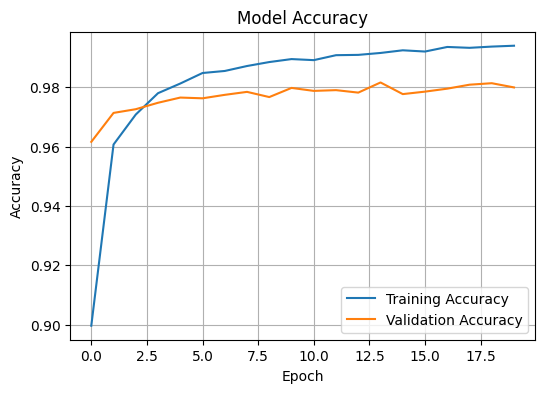

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()


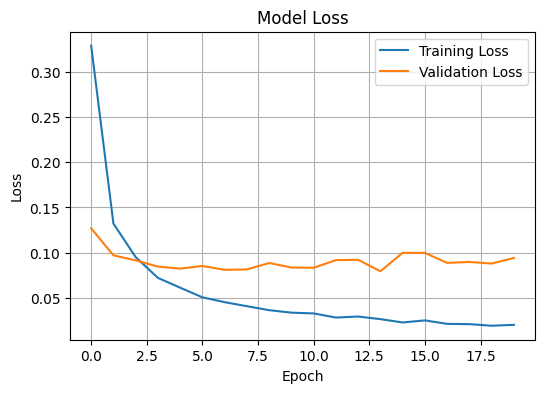

In [3]:

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


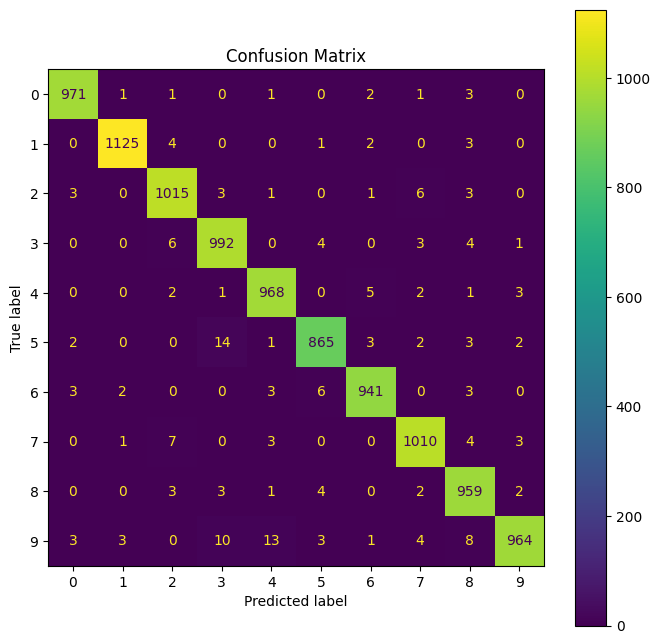

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10))
disp.plot( values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


<Axes: >

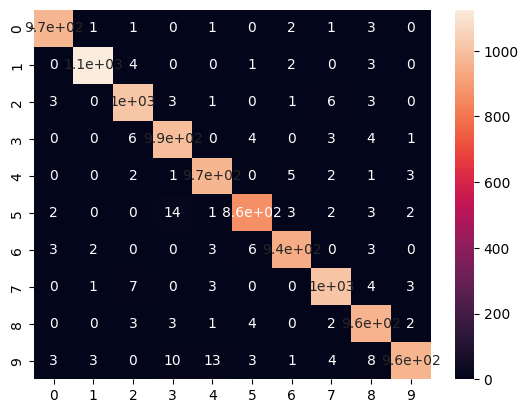

In [9]:
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)

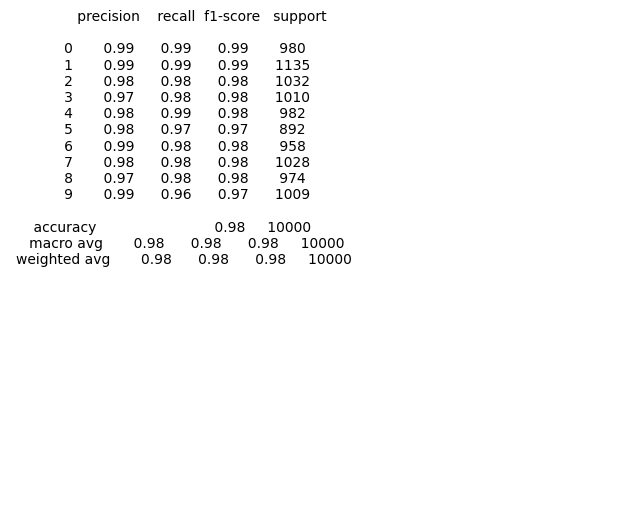

In [10]:
from sklearn.metrics import classification_report

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])

plt.figure(figsize=(8, 6))
plt.axis('off')
plt.text(0.01, 0.5, class_report, {'fontsize': 10})

plt.show()
